In [1]:
import numpy as np
import matplotlib as mpl

mpl.use('pgf')
# from matplotlib.backends.backend_pgf import FigureCanvasPgf
# mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)

In [2]:
img_dir = r'C:\Users\zatterin\OneDrive - University College London\OneDrive Synced Docs\report\img'

In [3]:
def tex_figsize(scale):
    fig_width_pt = 345.9                            # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

In [4]:
pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": tex_figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

In [7]:
import matplotlib.pyplot as plt

x = np.sin(np.linspace(0,10,100))
plt.figure(figsize=tex_figsize(0.6))
plt.axes([0.125,0.2,0.95-0.125,0.95-0.2])
plt.plot(x, 'g')
plt.ylabel(r'$\sin(x)$')
plt.savefig(img_dir+r'\test.pdf')

In [10]:
import matplotlib.pyplot as plt

x = np.sin(np.linspace(0,10,100))
fig = plt.figure(figsize=tex_figsize(0.8))
ax = fig.add_subplot(111)
ax.plot(x,'r')
ax.set_ylabel(r'$sin(x)$')
plt.savefig(img_dir + r'\test.pdf')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import edoxrd as xrd
from ipywidgets import interact, fixed, FloatSlider

# %matplotlib inline
# %config InlineBackend.figure_formats = set(['retina'])

In [7]:
sample = 'e16095'
di = '"C:\Users\zatterin\OneDrive - University College London\OneDrive Synced Docs\phd\data\XRD\"\\' + sample + '"\DteX"'

In [8]:
_103 = !ls {di} | find "103" | find "asc"
_104 = !ls {di} | find "104" | find "asc"
_002 = !ls {di} | find "002" | find "asc"
for fname in _103: print fname # Each list contains Sub and Film files.
# for fname in _104: print fname
# for fname in _002: print fname

e16095_01_-103_KTO_RSM_2-Theta.asc
e16095_02_-103_PTO_RSM_2-Theta.asc


## Plot RSMs

In [9]:
d = di.replace('\\','/').replace('"','') + '\\'

In [10]:
fig = plt.figure(figsize=(10,8))
xrd.plt_rsm(_103[0],_103[1],d,'sub')

C:\Users\zatterin\OneDrive - University College London\OneDrive Synced Docs\phd\scripts\edoxrd\edoxrd\read.py:124: RuntimeWarning: divide by zero encountered in log
  I = np.log(d2)


In [14]:
# fig, ax = newfig(0.6)
xrd.plt_rsm(_103[0],_103[1],d,'sub')
plt.show()

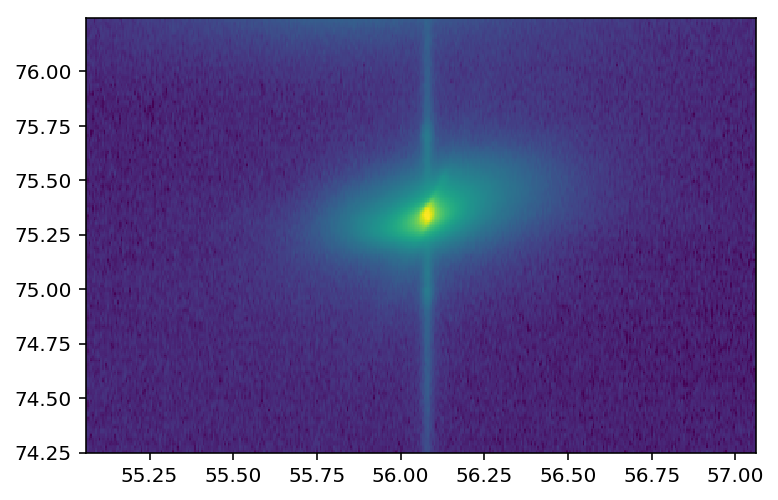

In [13]:
tt,om,i=xrd.read_rsm_data(_103[0],d,coordinates='ttomega')
plt.pcolormesh(om, tt ,i);

In [20]:
tt[i==i.max()], om[i==i.max()]

(array([ 75.303]), array([ 56.085]))

### Compare 

In [7]:
sample2 = 'e16020'
d2 = "/Users/ezatterin/Documents/UCL_phd/data/XRD/"+sample2+"/DteX/"
_103_2 = !ls {d2} | grep '103' | grep asc
for fname in _103_2: print fname

e16020_01_-103_KTO_RSM_2-Theta.asc
e16020_02_-103_PTO_RSM_2-Theta.asc


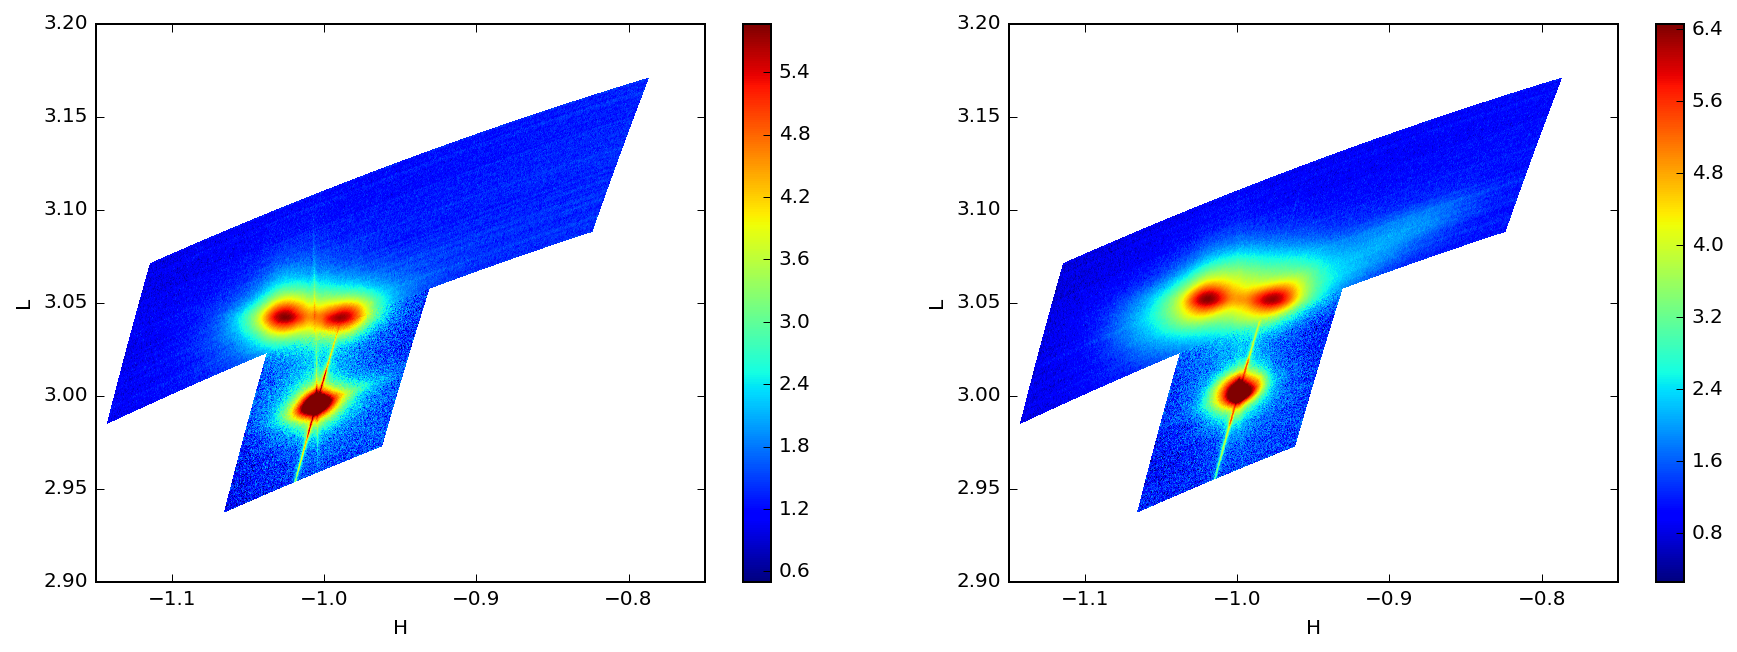

In [34]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
xrd.plt_rsm(_103_2[0],_103_2[1],d2,'sub')
plt.subplot(1,2,2)
xrd.plt_rsm(_103[0],_103[1],d,'sub')

## Profiles

In [43]:
dset = _103[1]

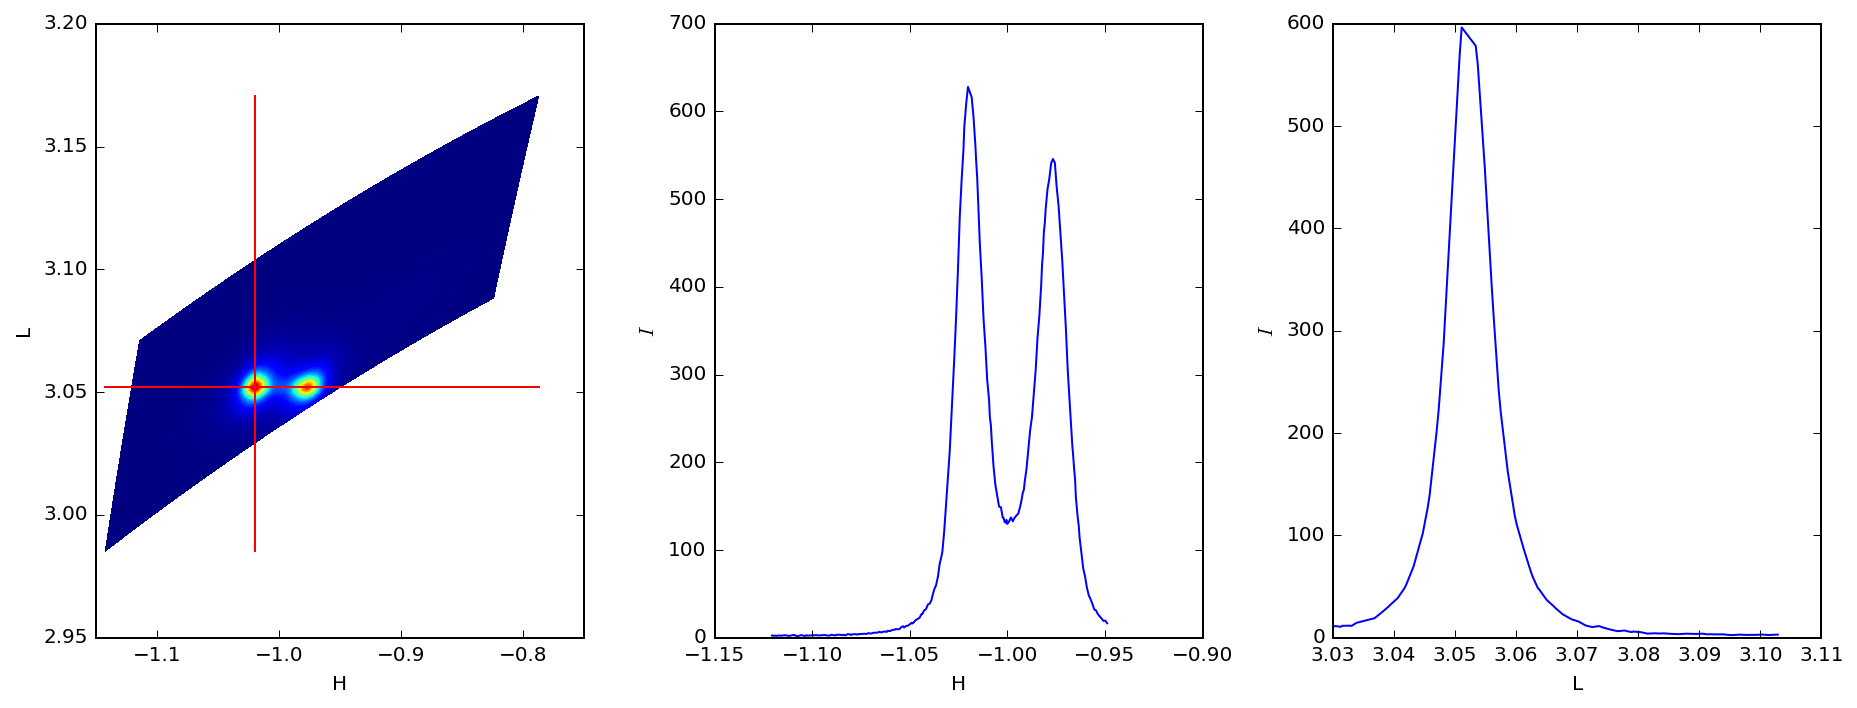

In [44]:
h,l,I = xrd.read_rsm_data(dset,d)
interact(xrd.plt_prof, sample=fixed(dset), d=fixed(d), scale=fixed('lin'), 
         L=FloatSlider(min=l.min(), max=l.max(), step=0.001, value=l[np.where(I==I.max())], continuous_update=False), 
         H=FloatSlider(min=h.min(), max=h.max(), step=0.0001, value=h[np.where(I==I.max())], continuous_update=False), 
         win=fixed(11), polyorder=fixed(3));